# Looping opponent max scores Notebook
## Author: Robert 
## Date: December 3, 2020 

The purpose of this notebook is to examine how player win percentage changes depending on the risk aversion of the opponents

In [11]:
## library imports

import csv ## for results writing

from dice import ScoreBasedPlayer, Game ## Dice game objects
from collections import defaultdict ## for storing results
from simulations import score_based_simulations ## for running simulations

In [12]:
## simulation parameters 

max_scores = [50*i for i in range(2,30)] ## maximum scores to examine, basically sets how the max risk the other players will take
num_games = 10000 ## number of simulations to run 
player_scores = range(50,1000,50) ## range of scores the player of interest will roll to before ending their turn

In [13]:
## dictionary for holding the results 

scores = defaultdict(float)

In [14]:
## loop through the max scores, checking how each player with different risk adversions fares against riskier and riskier opponents 

for score in max_scores:
    scores[score] = score_based_simulations([player_score for player_score in player_scores],num_games=num_games,max_player_scores=score)

KeyboardInterrupt: 

In [5]:
## write results to csv (could do this with pandas but I like doing things in sort of basic python sometimes)

with open('scoredbasedloopedopponentscores.csv',mode='w',newline='') as file:
    wr = csv.writer(file,delimiter=',')
    wr.writerow(['MaxOpponentScore','Score','WinPercentage','AverageOpponentScore'])
    for score in max_scores:
        for key,value in scores[score].items():
            wr.writerow([score,key,value[0],value[1]])

In [1]:
## library for checking results  

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
## reading in results 

df = pd.read_csv(r'scoredbasedloopedopponentscores.csv')
df

,MaxOpponentScore,Score,WinPercentage,AverageOpponentScore
0,100,50,0.1649,50.000
1,100,100,0.4184,50.000
2,100,150,0.6878,50.000
3,100,200,0.7832,50.000
4,100,250,0.8282,50.000
...,...,...,...,...
527,1450,750,0.1900,725.013
528,1450,800,0.1582,724.186
529,1450,850,0.1361,726.820
530,1450,900,0.1267,725.393


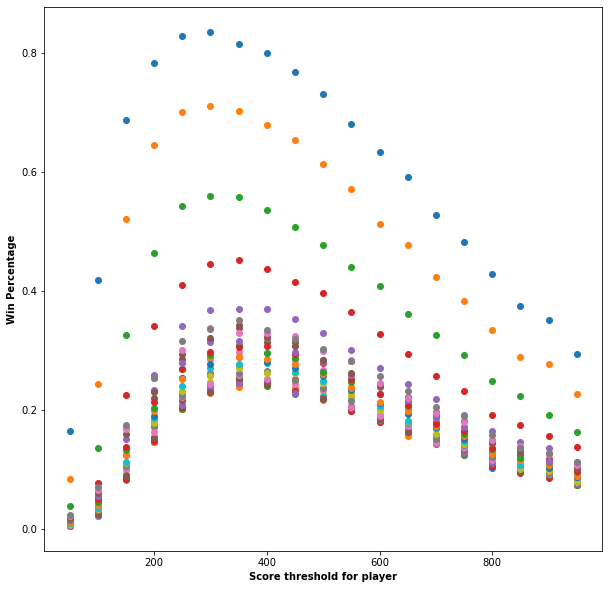

In [6]:
## plotting results 

fig,ax = plt.subplots(1,figsize=(10,10))
for score in df.MaxOpponentScore.unique():
    temp_df = df.loc[df.MaxOpponentScore == score]
    
    ax.scatter(temp_df.Score,temp_df.WinPercentage)
    
ax.set_xlabel("Score threshold for player",fontweight='bold')
ax.set_ylabel('Win Percentage',fontweight='bold')
    

    
plt.show()